## Bloqueo de Fotones Inducido por Interferencia Cuántica en un Sistema Cavidad-Punto Cuántico

In [1]:
!pip install qutip


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:
Ia = qeye(3)
Is = qeye(2)

a = destroy(3)
s = sigmap()

#A = tensor(a, Ib, Is)

def Corre(Delta,g,eta,Omega,theta,kappa,gamma, gammap=0):
  H = (Delta * tensor(a.dag() * a, Is)
      + Delta * tensor(Ia, s.dag() * s)
      + g * (tensor(a, s.dag()) + tensor(a.dag(), s))
      + eta * (tensor(a, Is)+tensor(a.dag(), Is))
      + Omega * tensor(Ia,(s.dag() * np.exp(-1j*theta) + s * np.exp(1j*theta))))

  ops = [np.sqrt(kappa)*tensor(a,Is),
        np.sqrt(gamma)*tensor(Ia,s),
        np.sqrt(gammap)*tensor(Ia,s.dag()*s)]

  rho_ss = steadystate(H, ops)
  n_ss = expect(tensor(a.dag() * a, Is), rho_ss)

  G2 = expect(tensor(a.dag() * a.dag() * a * a, Is), rho_ss)
  g2 = G2 / (n_ss ** 2)

  return (n_ss,g2)

def CorreTau(Delta,g,eta,Omega,theta,kappa,gamma):
  H = (Delta * tensor(a.dag() * a, Is)
      + Delta * tensor(Ia, s.dag() * s)
      + g * (tensor(a, s.dag()) + tensor(a.dag(), s))
      + eta * (tensor(a, Is)+tensor(a.dag(), Is))
      + Omega * tensor(Ia,(s.dag() * np.exp(-1j*theta) + s * np.exp(1j*theta))))

  ops = [np.sqrt(kappa)*tensor(a,Is),
        np.sqrt(gamma)*tensor(Ia,s)]

  rho_ss = steadystate(H, ops)
  n_ss = expect(tensor(a.dag() * a, Is), rho_ss)
  tlist = np.linspace(0, 0.06e-9, 200)
  #G2t = correlation_3op_1t(H, rho_ss, tlist, ops, tensor(a.dag(), Is), tensor(a.dag()*a, Is), tensor(a, Is))
  #g2t = G2t / (n_ss**2)
  (g2t,_) = coherence_function_g2(H, rho_ss, tlist, ops, tensor(a, Is))

  return (g2t)

#### Figura 2

In [5]:
f = 1e9
kappa = 20*2*np.pi*f
gamma = 1*2*np.pi*f
eta = 0.1*kappa

N = 200
g = np.linspace(0.001*kappa, 12*kappa, N)

JC = []
QI = []
for gi in g:
  par = (kappa+gamma)/gi
  R = np.sqrt(4+par**2)
  Omegao = eta*(R+np.sqrt(R**2+4))/2
  thetao = np.arctan(par/2)
  Delta = np.linspace(-2*gi, 2*gi, 100)
  Correl1 = []
  Correl2 = []
  for d in Delta:
    val1 = Corre(d,gi,eta,0,0,kappa,gamma)
    val2 = Corre(d,gi,eta,Omegao,thetao,kappa,gamma)
    Correl1.append(val1[1])
    Correl2.append(val2[1])
  JC.append(min(Correl1))
  QI.append(min(Correl2))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\2962096846.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


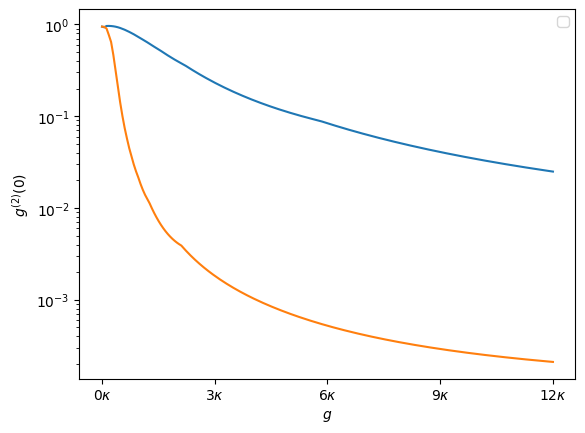

In [6]:
plt.plot(g, JC)
plt.plot(g, QI)
plt.xlabel(r'$g$')
plt.xticks([0*kappa, 3*kappa, 6*kappa, 9*kappa, 12*kappa], [r'0$\kappa$', r'3$\kappa$', r'6$\kappa$', r'9$\kappa$', r'12$\kappa$'])
plt.ylabel(r'$g^{(2)}(0)$')
plt.legend()
plt.yscale('log')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\3497219482.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


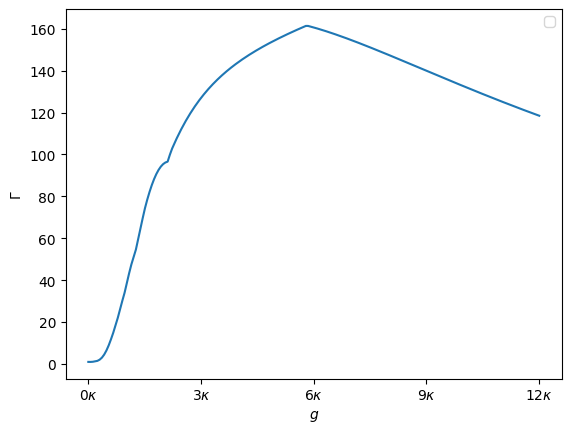

In [7]:
Ga = [a / b for a, b in zip(JC, QI)]
plt.plot(g, Ga)
plt.xlabel(r'$g$')
plt.xticks([0*kappa, 3*kappa, 6*kappa, 9*kappa, 12*kappa], [r'0$\kappa$', r'3$\kappa$', r'6$\kappa$', r'9$\kappa$', r'12$\kappa$'])
plt.ylabel(r'$\Gamma$')
plt.legend()
#plt.yscale('log')
plt.show()

#### Figura 3

In [8]:
f = 1e9
kappa = 20*2*np.pi*f
gamma = 1*2*np.pi*f
eta = 0.1*kappa
g = 2*kappa

Delta = np.linspace(-2*g, 2*g, 100)
Omega = [0, 0.124*g, 0.124*g]
theta = [0, 0.082*np.pi, (1-0.082)*np.pi]

Tau = np.linspace(0, 0.06e-9, 200)

L1 = [] #Correlación 0
L2 = [] #Fotones
L3 = [] #Correlación tau
for i in range(3):
  Correl = []
  Foton = []
  Corret = []
  for d in Delta:
    val = Corre(d,g,eta,Omega[i],theta[i],kappa,gamma)
    Correl.append(val[1])
    Foton.append(val[0])
  #for t in Tau:
  #  val = Corre(d,g,eta,Omega[i],theta[i])
  L1.append(Correl)
  L2.append(Foton)
  L3.append(CorreTau(g,g,eta,Omega[i],theta[i],kappa,gamma))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\3970848118.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


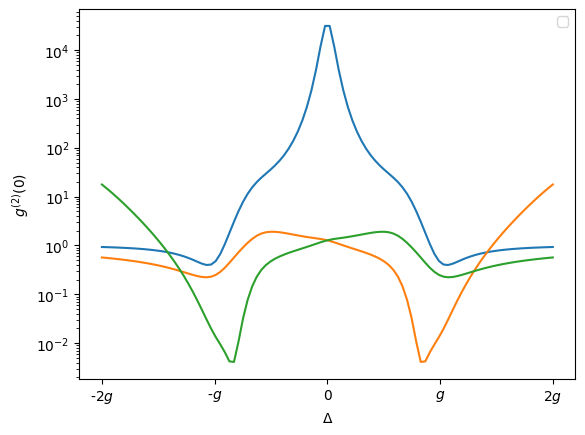

In [9]:
for i, j in enumerate(L1):
  plt.plot(Delta, j)#, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*g, -g, 0, g, 2*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.ylabel(r'$g^{(2)}(0)$')
plt.legend()
plt.yscale('log')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\4199765525.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


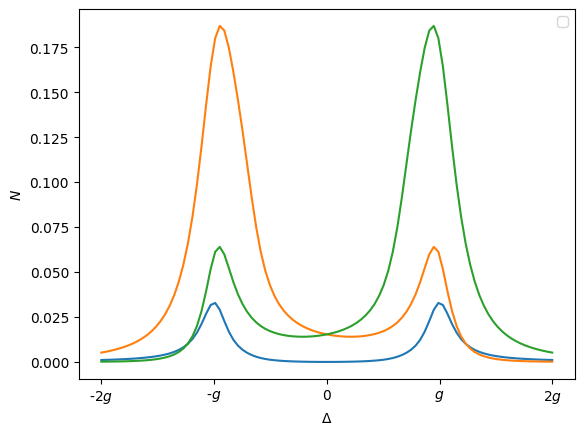

In [10]:
for i, j in enumerate(L2):
  plt.plot(Delta, j)#, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*g, -g, 0, g, 2*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.ylabel(r'$N$')
plt.legend()
plt.show()

c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\USUARIO\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\1544880683.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


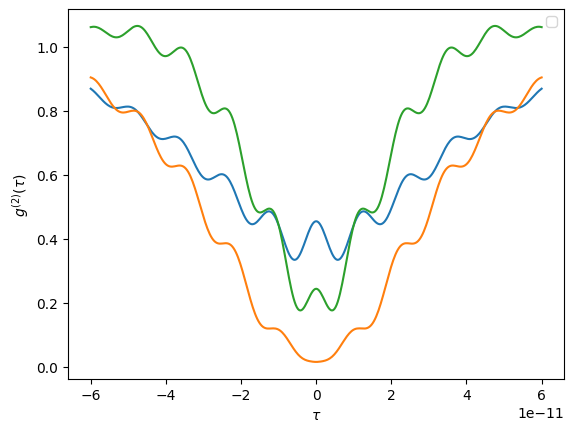

In [11]:
Taur = -Tau[::-1]
Tauc = np.concatenate((Taur, Tau))
for i, j in enumerate(L3):
  jr = j[::-1]
  jc = np.concatenate((jr, j))
  plt.plot(Tauc, jc)#, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\tau$')
#plt.xticks([-2*g, -g, 0, g, 2*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.ylabel(r'$g^{(2)}(\tau)$')
plt.legend()
#plt.yscale('log')
plt.show()

#### Figura 4

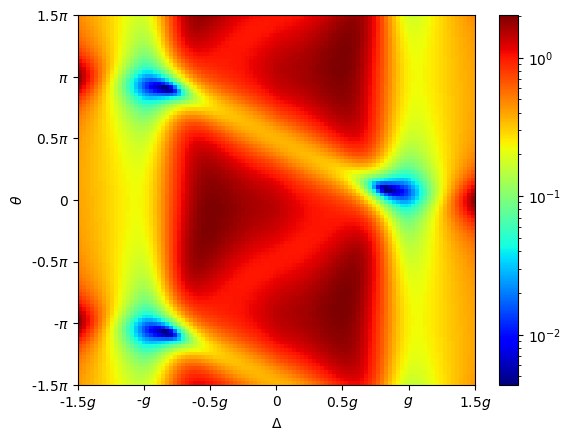

In [12]:
f = 1e9
kappa = 20*2*np.pi*f
gamma = 1*2*np.pi*f
eta = 0.1*kappa
g = 2*kappa
Omega = 0.124*g

N = 100
Delta = np.linspace(-1.5*g, 1.5*g, N)
theta = np.linspace(-1.5*np.pi, 1.5*np.pi, N)

L1=np.zeros([N,N])
i = 0
for t in theta:
  j = 0
  for d in Delta:
    val = Corre(d,g,eta,Omega,t,kappa,gamma)
    L1[-i-1][j] = val[1]
    j+=1
  i+=1

fig, ax = plt.subplots()
norm = mcolors.LogNorm(vmin=np.min(L1[L1 > 0]), vmax=np.max(L1))
img = plt.imshow(L1, cmap = plt.cm.jet, extent=[-1.5*np.pi,1.5*np.pi,-1.5*g,1.5*g], aspect="auto", norm=norm)
plt.colorbar(img)
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\theta$')
plt.xticks([-1.5*np.pi, -np.pi, -0.5*np.pi, 0, 0.5*np.pi, np.pi, 1.5*np.pi], [r'-1.5$g$', r'-$g$', r'-$0.5g$', '0', r'$0.5g$', r'$g$', r'1.5$g$'])
plt.yticks([-1.5*g, -g, -0.5*g, 0, 0.5*g, g, 1.5*g], [r'-1.5$\pi$', r'-$\pi$', r'-$0.5\pi$', '0', r'$0.5\pi$', r'$\pi$', r'1.5$\pi$'])
plt.show()

#### Figura 5

In [13]:
f = 1e9
kappa = 20*2*np.pi*f
gamma = 1*2*np.pi*f
eta = 0.1*kappa
g = 2*kappa
theta = 0.082*np.pi

N = 100
Delta = np.linspace(-2*g, 2*g, N)
Omega = np.linspace(0*g, 0.3*g, N)

L1=np.zeros([N,N])
L2=np.zeros([N,N])
i = 0
for O in Omega:
  j = 0
  for d in Delta:
    val = Corre(d,g,eta,O,theta,kappa,gamma)
    L1[-i-1][j] = val[1]
    L2[-i-1][j] = val[0]
    j+=1
  i+=1

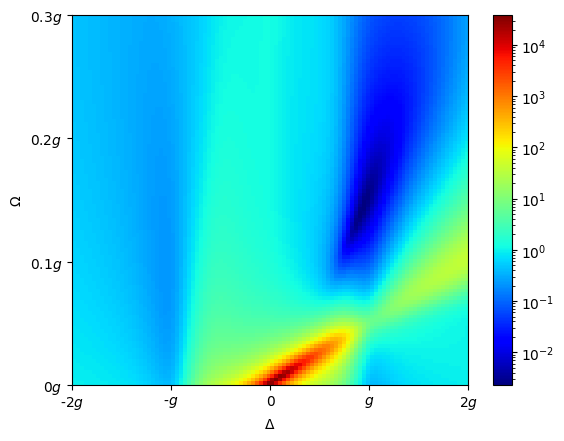

In [14]:
fig, ax = plt.subplots()
norm = mcolors.LogNorm(vmin=np.min(L1[L1 > 0]), vmax=np.max(L1))
img = plt.imshow(L1, cmap = plt.cm.jet, extent=[0*g,0.3*g,-2*g,2*g], aspect="auto", norm=norm)
plt.colorbar(img)
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\Omega$')
plt.xticks([0*g, 0.075*g, 0.15*g, 0.225*g, 0.3*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.yticks([-2*g, -0.67*g, 0.67*g, 2*g], [r'0$g$', r'0.1$g$', r'0.2$g$', r'0.3$g$'])
plt.show()

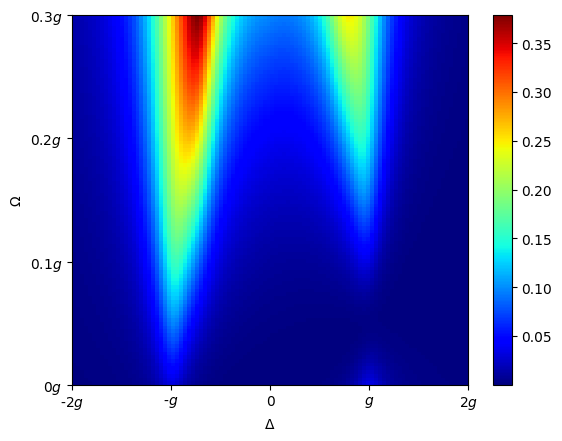

In [15]:
fig, ax = plt.subplots()
#norm = mcolors.LogNorm(vmin=np.min(L2[L2 > 0]), vmax=np.max(L2))
img = plt.imshow(L2, cmap = plt.cm.jet, extent=[0*g,0.3*g,-2*g,2*g], aspect="auto")#, norm=norm)
plt.colorbar(img)
plt.xlabel(r'$\Delta$')
plt.ylabel(r'$\Omega$')
plt.xticks([0*g, 0.075*g, 0.15*g, 0.225*g, 0.3*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.yticks([-2*g, -0.67*g, 0.67*g, 2*g], [r'0$g$', r'0.1$g$', r'0.2$g$', r'0.3$g$'])
plt.show()

#### Figura 6

In [16]:
f = 1e9
kappa = 20*2*np.pi*f
gamma = 1*2*np.pi*f
eta = 0.1*kappa
g = 2*kappa

Delta = np.linspace(-2*g, 2*g, 100)
Omega = 0.124*g
theta = 0.082*np.pi

gammap = [0*gamma, 0.5*gamma, 5*gamma]

L1 = [] #Correlación 0
L2 = [] #Fotones
for i in range(3):
  Correl = []
  Foton = []
  for d in Delta:
    val = Corre(d,g,eta,Omega,theta,kappa,gamma,gammap[i])
    Correl.append(val[1])
    Foton.append(val[0])
  L1.append(Correl)
  L2.append(Foton)

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\3970848118.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


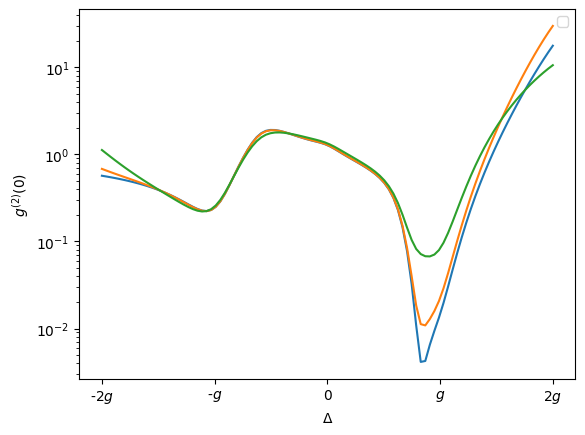

In [17]:
for i, j in enumerate(L1):
  plt.plot(Delta, j)#, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*g, -g, 0, g, 2*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.ylabel(r'$g^{(2)}(0)$')
plt.legend()
plt.yscale('log')
plt.show()

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_8228\4199765525.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


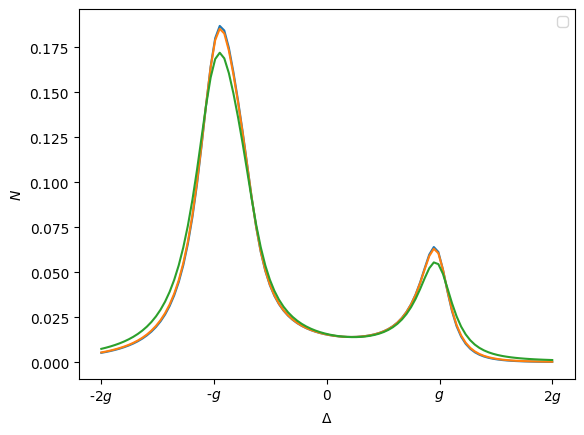

In [22]:
for i, j in enumerate(L2):
  plt.plot(Delta, j)#, label='J='+str(index[i])+r'$\kappa$', lw=2)
plt.xlabel(r'$\Delta$')
plt.xticks([-2*g, -g, 0, g, 2*g], [r'-2$g$', r'-$g$', '0', r'$g$', r'2$g$'])
plt.ylabel(r'$N$')
plt.legend()
plt.show()